<a href="https://colab.research.google.com/github/rmr327/IntepretableTrees/blob/main/ImodelsDemoDecisionTreeXAi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Necessary Imports

In [11]:
!pip install imodels
!pip install --upgrade imodels scikit-learn --quiet

import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import plot_tree

from imodels import RuleFitRegressor
from imodels.importance import RandomForestPlusRegressor
from imodels import HSTreeClassifierCV, get_clean_dataset
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

# Suppress DeprecationWarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)

# Datasets

> California Housing Dataset

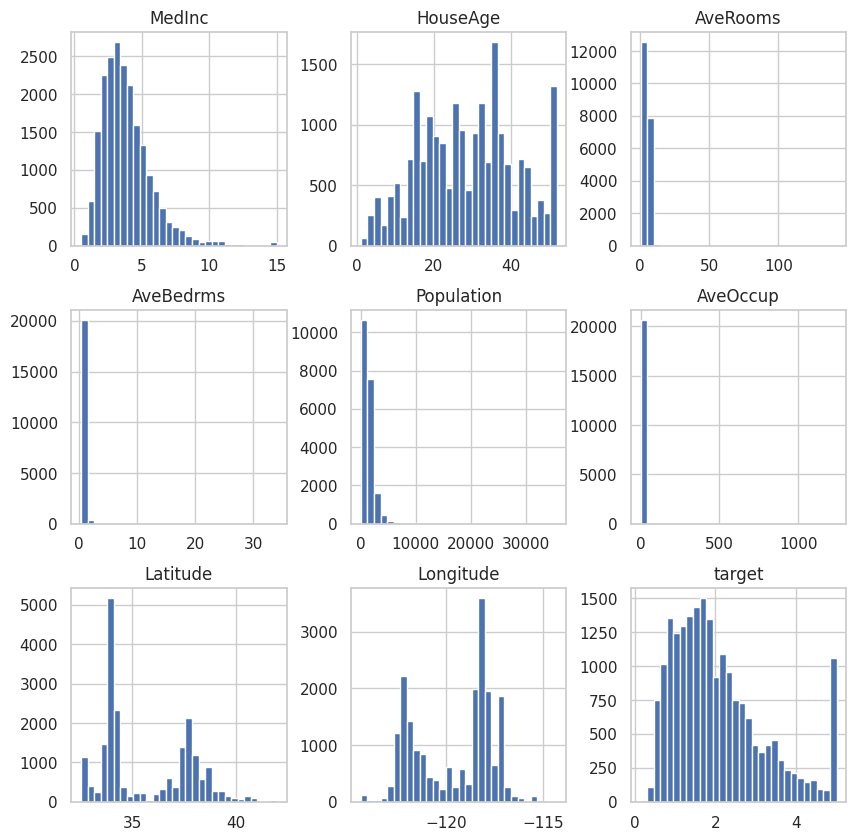

In [13]:
# Load the California Housing dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# visualize the datase
sns.set(style="whitegrid")

# Create a DataFrame from the Iris dataset
df = pd.DataFrame(X, columns=housing.feature_names)
df['target'] = y
df.hist(figsize=(10, 10), bins=30)
plt.show()

In [ ]:
df.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


>

> Csi_pecarn_pred dataset for high-stakes rule based modeling

In [6]:
X_2, y_2, feat_names_2 = get_clean_dataset('csi_pecarn_pred')
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(
X_2, y_2, test_size=0.33, random_state=21)

# visualize the datase
sns.set(style="whitegrid")

# Create a DataFrame from the Iris dataset
df = pd.DataFrame(X_2, columns=feat_names_2)
df['target'] = y_2
df.describe()

,SITE,LOC,ambulatory,Predisposed,HighriskDiving,HighriskFall,HighriskHanging,HighriskHitByCar,HighriskMVC,HighriskOtherMV,...,PtCompPainFace2,PtCompPainExt2,PtCompPainTorsoTrunk2,PtTenderHead2,PtTenderFace2,PtTenderExt2,PtTenderTorsoTrunk2,AgeInYears,gender_F,target
count,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,...,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000,3313.000000
mean,9.740719,0.426803,0.214609,0.006641,0.012979,0.038334,0.001509,0.150921,0.147299,0.031090,...,0.075762,0.258678,0.289466,0.077875,0.038334,0.151524,0.258678,9.972934,0.392695,0.162994
std,4.825152,0.494688,0.410613,0.081231,0.113202,0.192030,0.038825,0.358025,0.354457,0.173586,...,0.264657,0.437974,0.453583,0.268015,0.192030,0.358613,0.437974,4.714482,0.488424,0.369416
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.700000,0.000000,0.000000
50%,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.090000,0.000000,0.000000
75%,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,14.220000,1.000000,0.000000
max,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000,1.000000


# RuleFit Algorithm

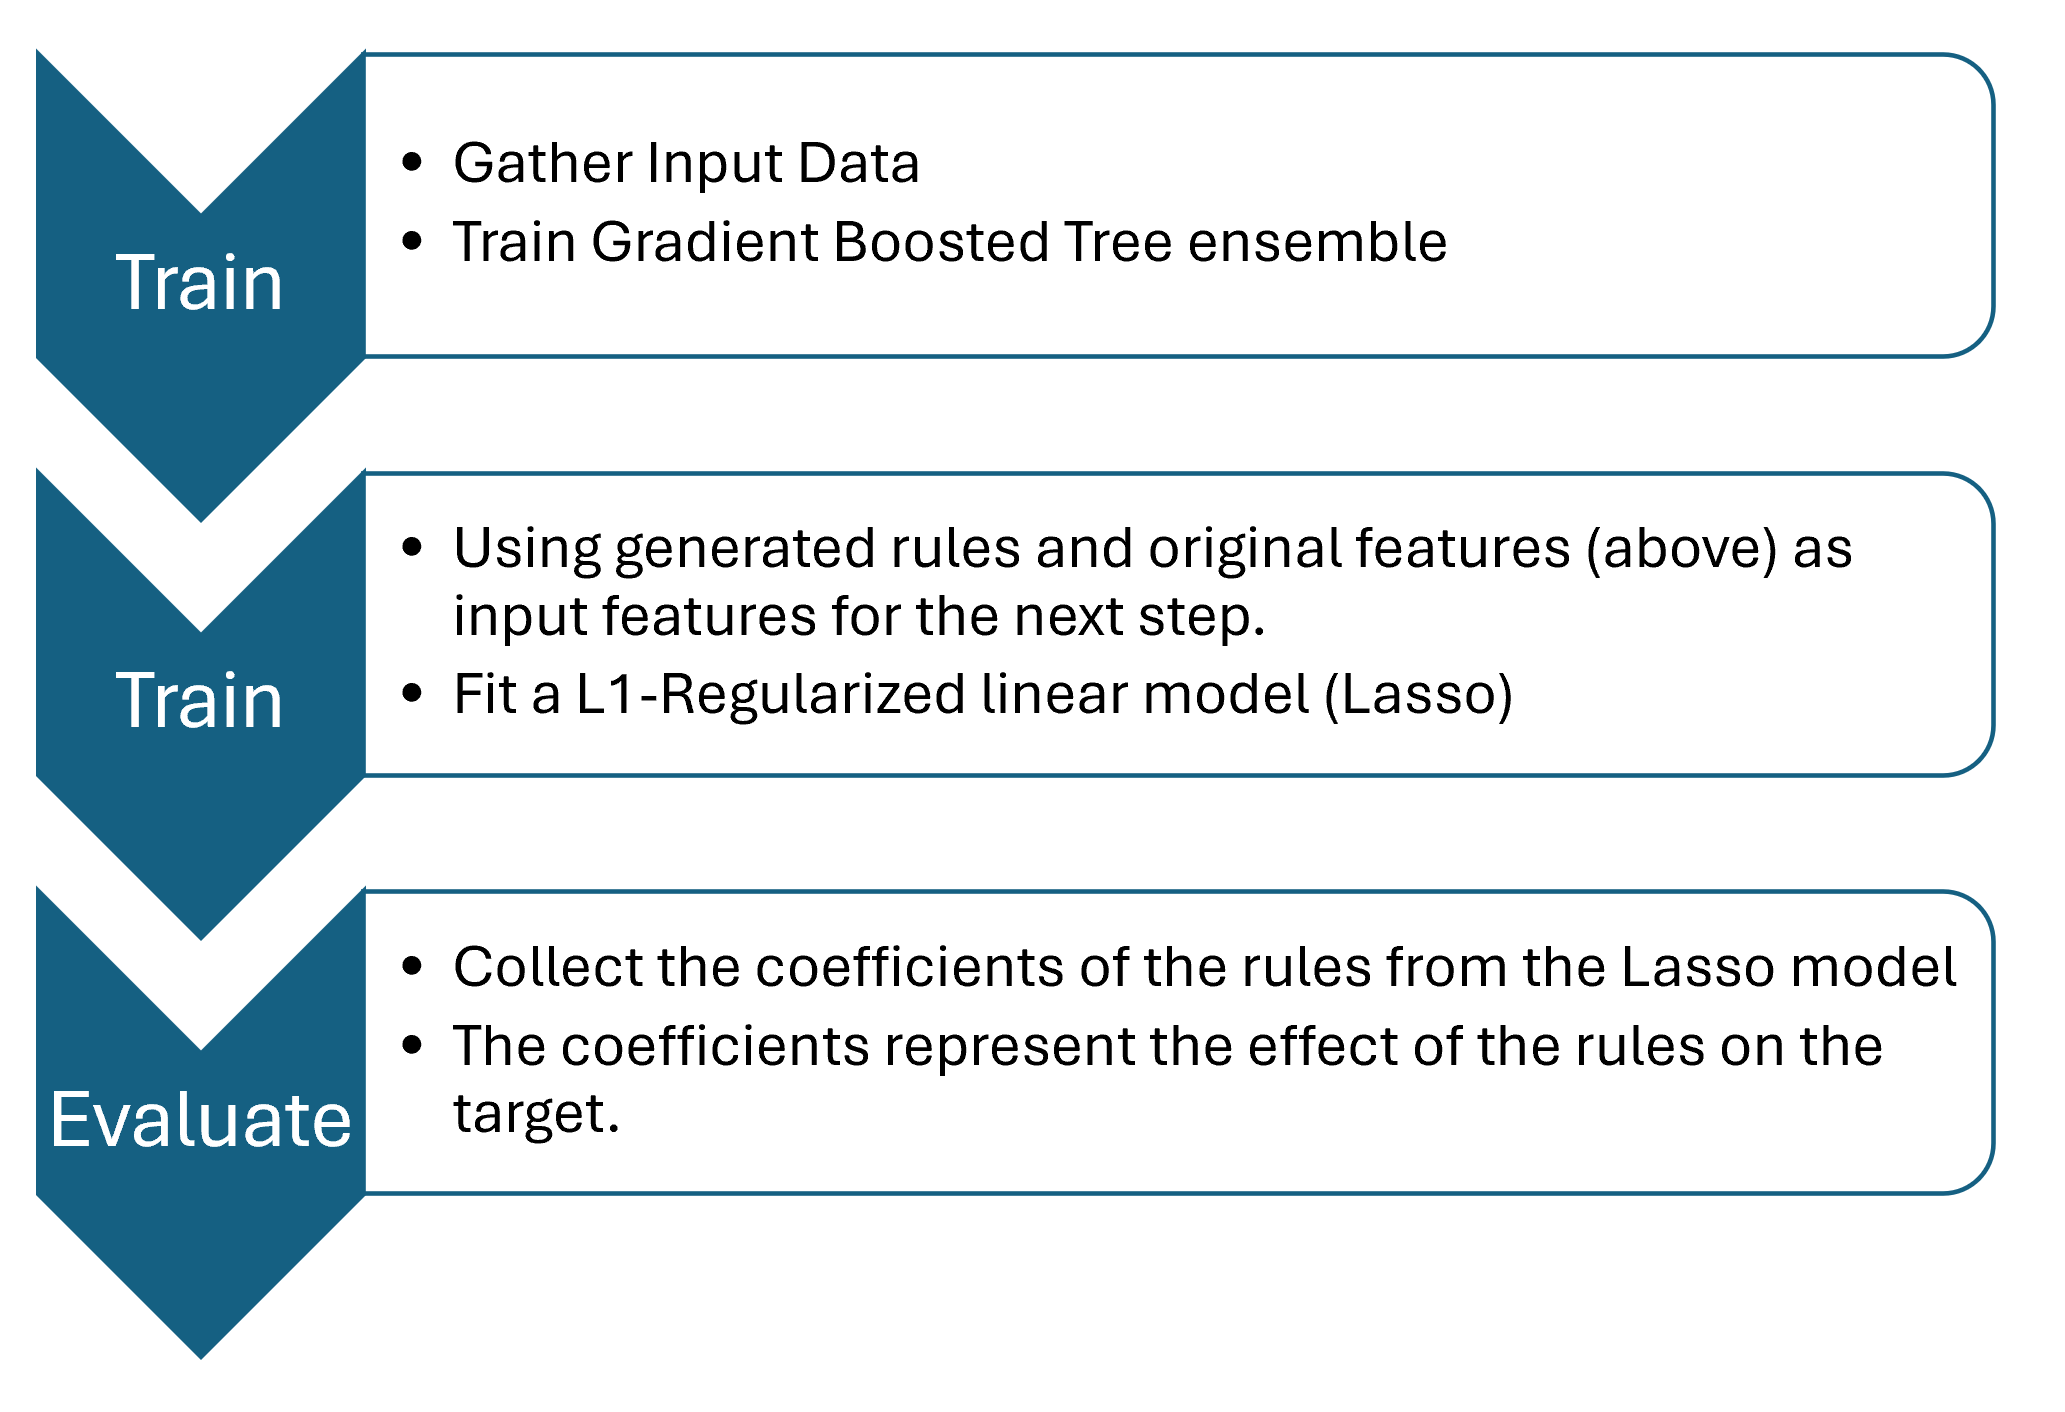

In [ ]:
# Initialize the RuleFitRegressor
model = RuleFitRegressor()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Mean Squared Error: 0.43


> Predictions are made by summing the coefficients of each rule

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: xlabel='rule'>

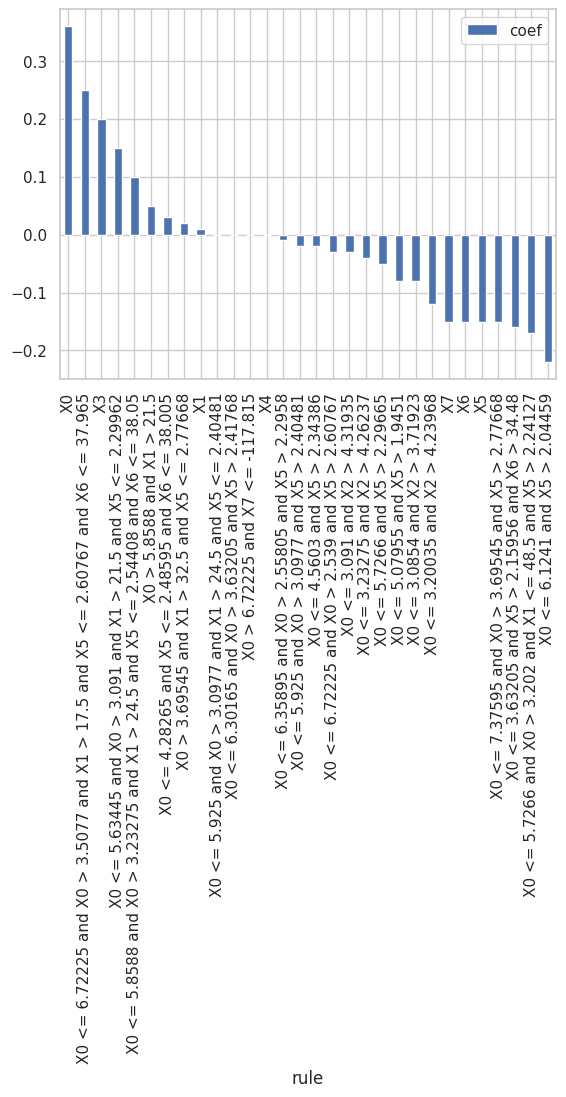

In [ ]:
# Extract the rules
rule_df = model.visualize()
rule_df_sorted = rule_df.sort_values(by='coef', ascending=False)

rule_df_sorted.plot(x='rule', y='coef', kind='bar')

# Hierarchical Shrinkage model

Hierarchical Shrinkage (HS) is a post-hoc regularization algorithm designed to improve the accuracy and interpretability of tree-based models, such as decision trees and random forests.

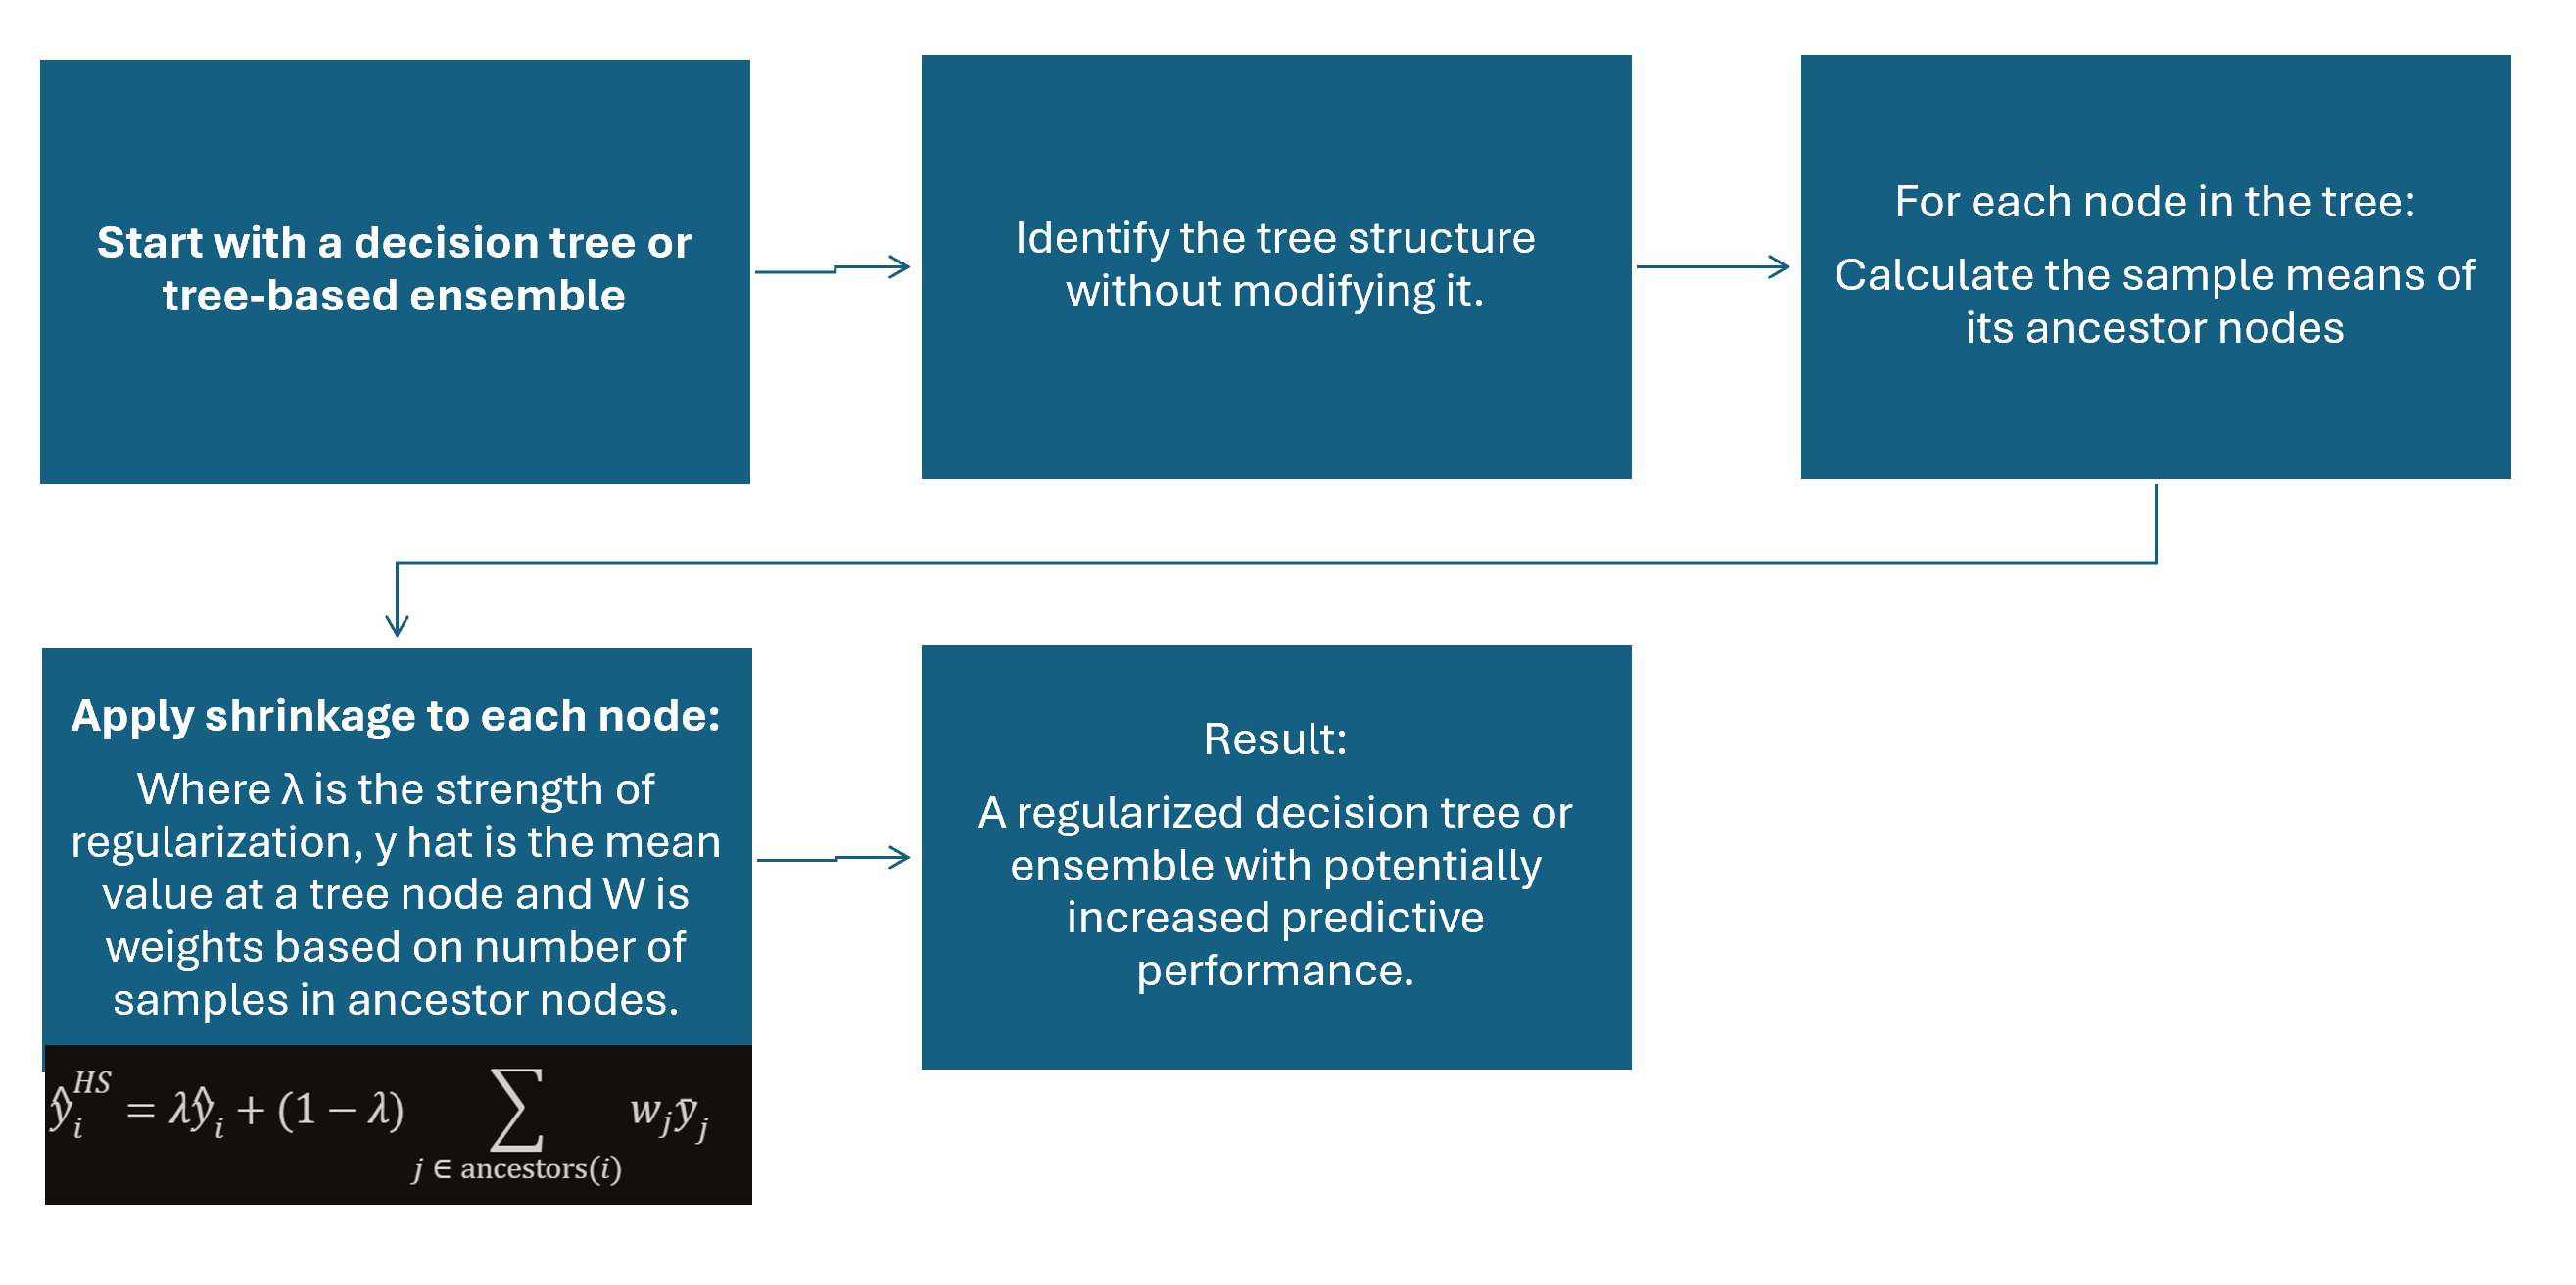

[Text(0.6, 0.9166666666666666, 'FocalNeuroFindings2 <= 0.5\ngini = 0.268\nsamples = 2219\nvalue = [0.84, 0.16]'),
 Text(0.4, 0.75, 'HighriskDiving <= 0.5\ngini = 0.199\nsamples = 1892\nvalue = [0.888, 0.112]'),
 Text(0.5, 0.8333333333333333, 'True  '),
 Text(0.3, 0.5833333333333334, 'Torticollis2 <= 0.5\ngini = 0.19\nsamples = 1876\nvalue = [0.894, 0.106]'),
 Text(0.2, 0.4166666666666667, 'HighriskMVC <= 0.5\ngini = 0.172\nsamples = 1776\nvalue = [0.905, 0.095]'),
 Text(0.1, 0.25, 'gini = 0.136\nsamples = 1493\nvalue = [0.926, 0.074]'),
 Text(0.3, 0.25, 'AlteredMentalStatus2 <= 0.5\ngini = 0.33\nsamples = 283\nvalue = [0.791, 0.208]'),
 Text(0.2, 0.08333333333333333, 'gini = 0.219\nsamples = 192\nvalue = [0.874, 0.125]'),
 Text(0.4, 0.08333333333333333, 'gini = 0.473\nsamples = 91\nvalue = [0.614, 0.383]'),
 Text(0.4, 0.4166666666666667, 'gini = 0.42\nsamples = 100\nvalue = [0.7, 0.3]'),
 Text(0.5, 0.5833333333333334, 'gini = 0.305\nsamples = 16\nvalue = [0.187, 0.812]'),
 Text(0.8, 0.

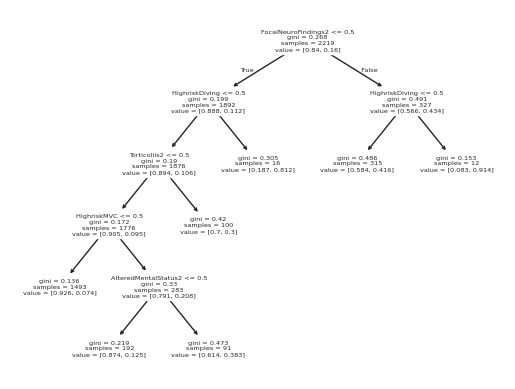

In [9]:
# This example is straight from the documentation page.
# fit the model
model = HSTreeClassifierCV(max_leaf_nodes=7)  # initialize a model
model.fit(X_train_2, y_train_2)   # fit model
preds = model.predict(X_test_2) # discrete predictions: shape is (n_test, 1)
preds_proba = model.predict_proba(X_test_2) # predicted probabilities: shape is (n_test, n_classes)

# visualize the model
plot_tree(model.estimator_, feature_names=feat_names_2)

# RandomForestPlusRegressor

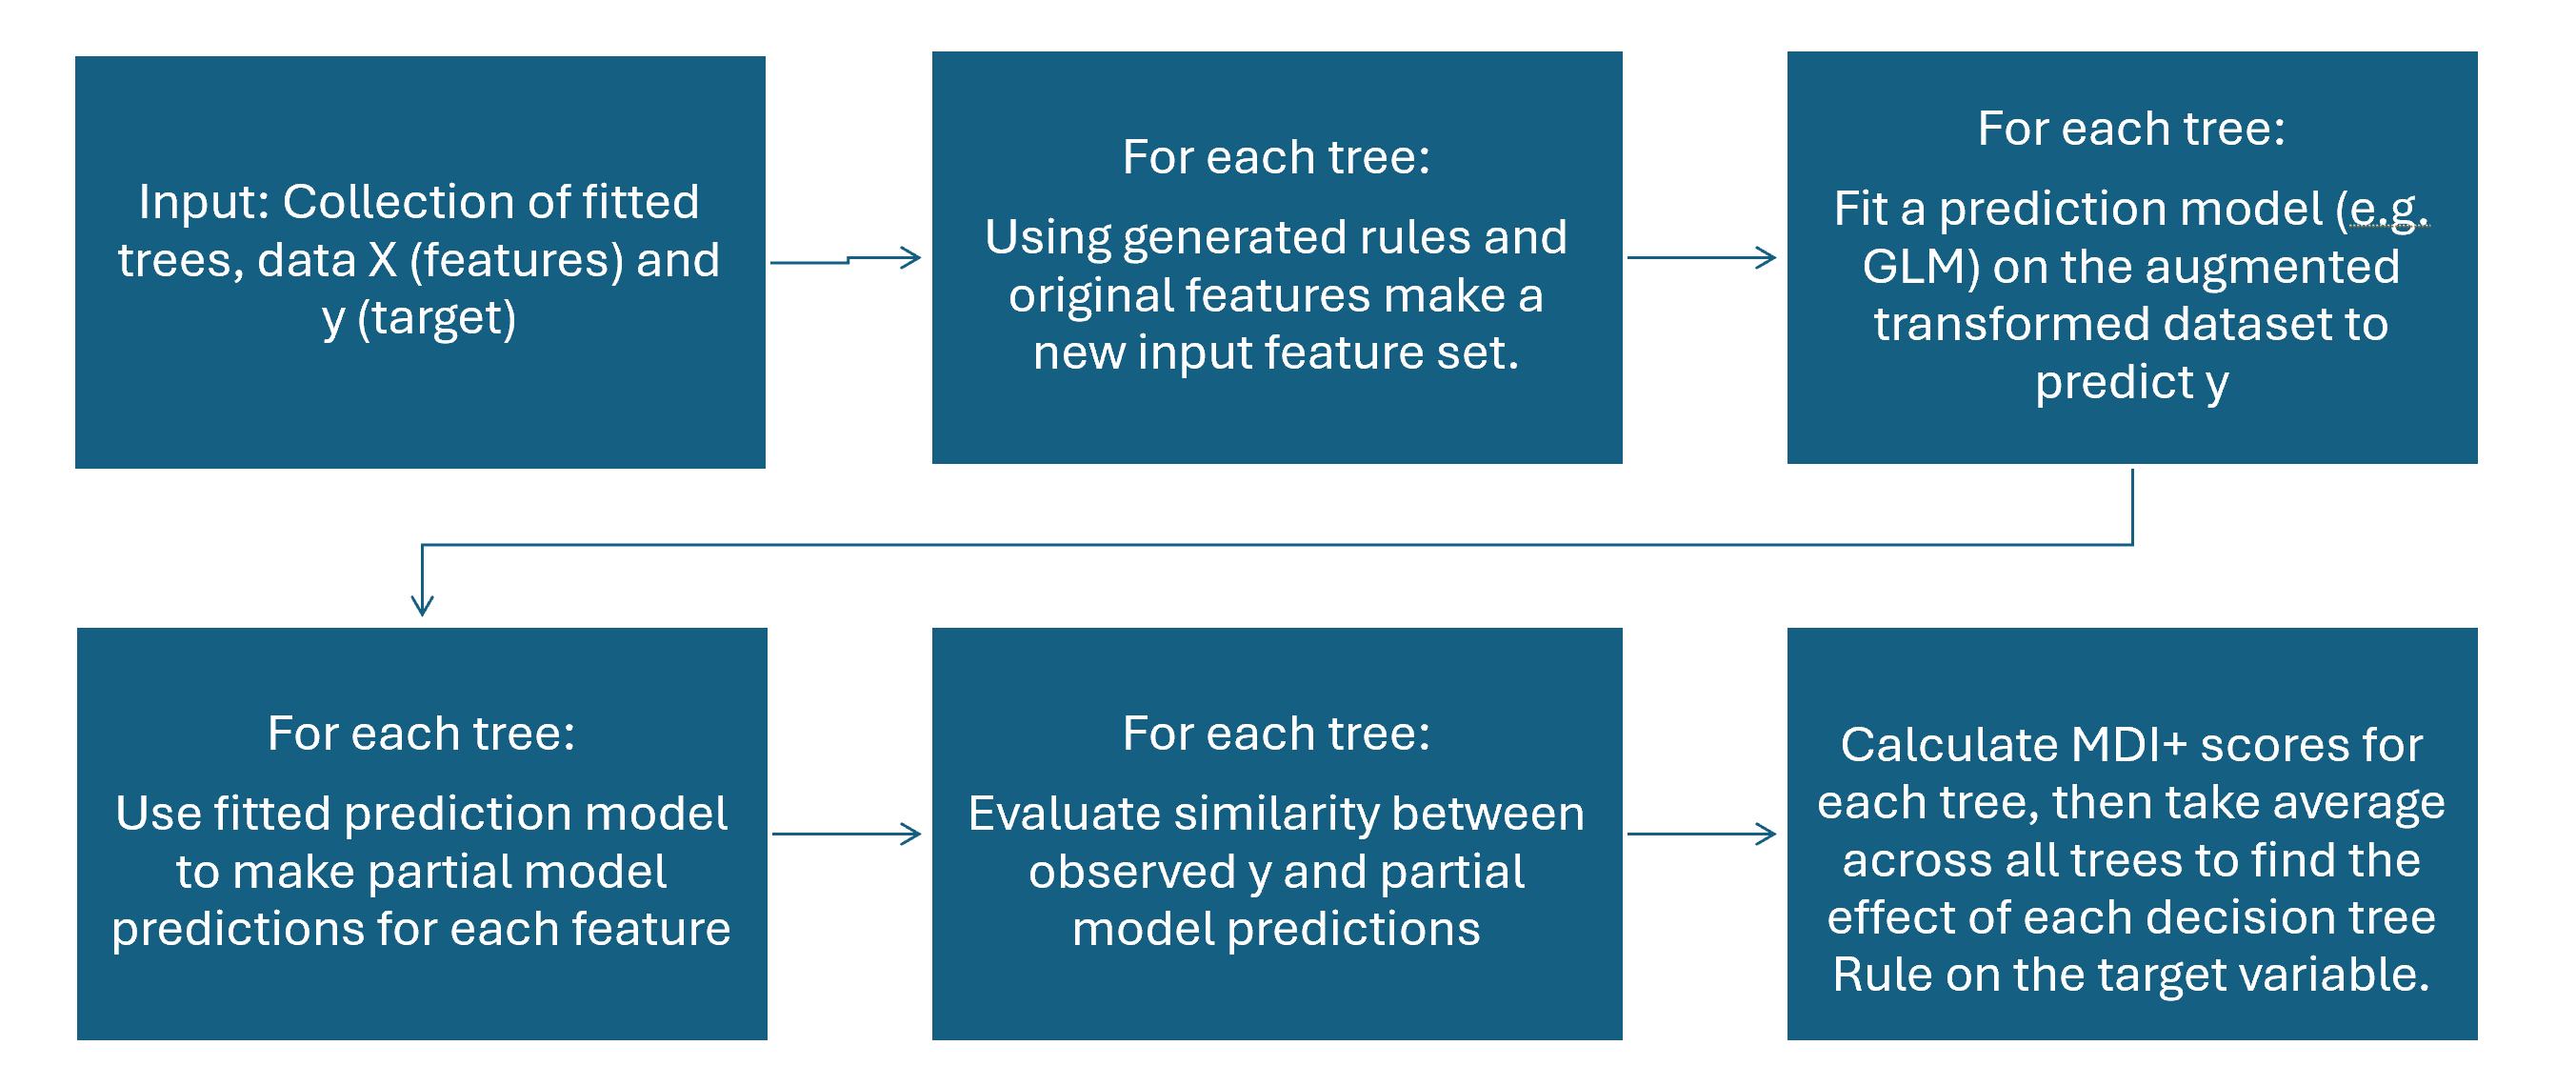

In [ ]:
rf_plus_model = RandomForestPlusRegressor()
rf_plus_model.fit(X_train, y_train)
mdi_plus_scores = rf_plus_model.get_mdi_plus_scores(X_test, y_test)

mdi_plus_scores